In [1]:
import pandas as pd
import folium as fl
import os 
import csv
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.offline as plo
from collections import Counter, defaultdict
from matplotlib import dates as mplDates
sb.set()

In [2]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\Global Terrorism Database\globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1", low_memory = False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
pd.set_option("display.max_rows", 150)
countryTxt = df["country_txt"].value_counts().sort_index(ascending = True).to_frame()
countryTxt.head().style.background_gradient(cmap = "Greens")#

,country_txt
Afghanistan,12731
Albania,80
Algeria,2743
Andorra,1
Angola,499


In [5]:
df["attacktype1_txt"].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [6]:
countryGrp = df.groupby("country_txt")
grpKe = countryGrp.get_group("Kenya")
grpKe["attacktype1_txt"].value_counts(0)


Bombing/Explosion                      277
Armed Assault                          242
Hostage Taking (Kidnapping)             40
Assassination                           38
Facility/Infrastructure Attack          31
Unknown                                 18
Hijacking                               15
Hostage Taking (Barricade Incident)     13
Unarmed Assault                          9
Name: attacktype1_txt, dtype: int64

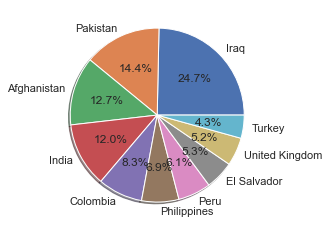

In [7]:
with open("D:\Open Classroom\Data Files\Global Terrorism Database\globalterrorismdb_0718dist.csv") as file:
    fileReader = csv.DictReader(file)
    fileCounter = Counter()
    
    for line in fileReader:
        fileCounter.update(line["country_txt"].split("-"))
        
attackType = []
totalAttacks = []

for i in fileCounter.most_common(10):
    attackType.append(i[0])
    totalAttacks.append(i[1])
#print(totalAttacks)
plt.pie(totalAttacks, labels = attackType, shadow = True, autopct = "%1.1f%%")
plt.show()

In [8]:
country = df.groupby("country_txt")
grpKe = country.get_group("Kenya")
country["targtype1_txt"].value_counts().to_frame()

targtype1_txt
country_txt targtype1_txt                                
Afghanistan Police                                   3558
            Private Citizens & Property              2626
            Military                                 2270
            Government (General)                     1626
            Unknown                                   756
...                                                   ...
Zimbabwe    Religious Figures/Institutions              5
            Utilities                                   4
            Tourists                                    3
            Transportation                              3
            Food or Water Supply                        1

[2321 rows x 1 columns]

In [9]:
gangname = df.groupby("gname")
country["gname"].value_counts().head(100)

country_txt  gname                                                                               
Afghanistan  Taliban                                                                                 7423
             Unknown                                                                                 4806
             Khorasan Chapter of the Islamic State                                                    242
             Haqqani Network                                                                           84
             Hizb-I-Islami                                                                             42
             Al-Qaida                                                                                  20
             Tehrik-i-Taliban Pakistan (TTP)                                                           15
             Gunmen                                                                                     9
             Afghan Guerrillas                        

In [10]:
natlty1_txt = df.groupby("natlty1_txt")
natlty1_txt["target1"].value_counts().head(50)

natlty1_txt  target1              
Afghanistan  Civilians                714
             Checkpoint               678
             Vehicle                  660
             Officers                 453
             Checkpost                378
             Soldiers                 314
             Post                     236
             Patrol                   173
             Checkpoints              155
             Posts                    142
             Convoy                   123
             Officer                  113
             District                 106
             Unknown                  101
             Checkposts                99
             Headquarters              85
             House                     78
             Village                   76
             Mosque                    75
             Civilian                  69
             Base                      57
             Van                       50
             Polling Station           47

In [11]:
df["iday"].head()

0    2
1    0
2    0
3    0
4    0
Name: iday, dtype: int64

In [12]:
iday = df["iday"] == 0
df.drop(index = df[iday].index, inplace = True)
df["iday"].head()

0    2
5    1
6    2
7    2
8    2
Name: iday, dtype: int64

In [13]:
df["imonth"].tail()

181686    12
181687    12
181688    12
181689    12
181690    12
Name: imonth, dtype: int64

In [14]:
imonth = df["imonth"] == 0
df.drop(index = df[imonth].index, inplace = True)
df["imonth"].head()

0    7
5    1
6    1
7    1
8    1
Name: imonth, dtype: int64

In [15]:
df["date"] = df["iyear"].astype(str) + "-" + df["imonth"].astype(str) + "-" + df["iday"].astype(str)
df["date"].head()

0    1970-7-2
5    1970-1-1
6    1970-1-2
7    1970-1-2
8    1970-1-2
Name: date, dtype: object

In [16]:
droprow = df["date"] == "1970-0-0"
df.drop(index = df[droprow].index, inplace = True)
df["date"].head()

0    1970-7-2
5    1970-1-1
6    1970-1-2
7    1970-1-2
8    1970-1-2
Name: date, dtype: object

In [17]:
df["date"] = pd.to_datetime(df["date"])
df["date"].head()

0   1970-07-02
5   1970-01-01
6   1970-01-02
7   1970-01-02
8   1970-01-02
Name: date, dtype: datetime64[ns]

In [18]:
df["day"] = df["date"].dt.day_name()
df["day"].head()

0    Thursday
5    Thursday
6      Friday
7      Friday
8      Friday
Name: day, dtype: object

In [19]:
df["longDate"] = pd.to_datetime(df["date"], format = "%b-%d-%Y")
df["longDate"].head()

0   1970-07-02
5   1970-01-01
6   1970-01-02
7   1970-01-02
8   1970-01-02
Name: longDate, dtype: datetime64[ns]

In [20]:
df.drop(columns = ["longDate"], inplace = True)

In [21]:

pd.set_option("display.max_rows", 300)

df["latitude"].dropna(axis = "index", how = "any", inplace = True)
df["longitude"].dropna(axis = "index", how = "any", inplace = True)

m = fl.Map(location = [18.456792, -69.951164], zoom_start = 3)

lat = list(df["latitude"].head(300))
lon = list(df["longitude"].head(300))
attacktype = list(df["attacktype1_txt"].head(300))
target = list(df["targtype1_txt"].head(300))
gang = list(df["gname"].head(300))
date = list(df["date"].head(300))
day = list(df["day"].head(300))

fg = fl.FeatureGroup("terrorism hotspot")

for lt, ln, attack, trgt, gng, dt, dy in zip(lat, lon, attacktype, target, gang, date, day):
    fg.add_child(fl.Marker(location = [lt, ln], popup = "<b> Gang Name : </b>" + gng + "</br> <b> Type of Attack : </b>" + attack + "</br> <b> Target Group : </b>" + trgt + "</br> <b> Date : </b>" + dy + ", " + str(dt), icon = fl.Icon(color = "red")))

m.add_child(fg)
m.save("terrorism.html")
m

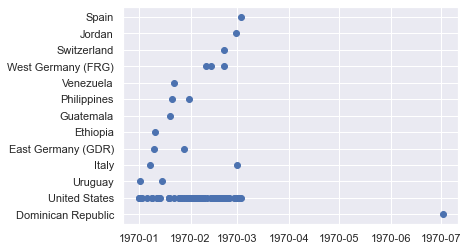

In [22]:
date = list(df["date"].head(100))
plt.plot_date(date, df["country_txt"].head(100))
plt.show()

In [23]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,day
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02,Thursday
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,1970-01-01,Thursday
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,PGIS,0,0,0,0,NaN,1970-01-02,Friday
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,1970-01-02,Friday
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,"David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN,1970-01-02,Friday


In [24]:
df["eventid"][5]

197001010002

In [25]:
df.set_index(df["date"], inplace = True)

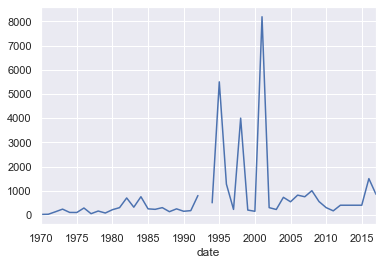

In [26]:
dfsample = df["nwound"].resample("y").max()
%matplotlib inline
dfsample.plot()

In [27]:
sample70 = (df["date"] > pd.to_datetime("1970-1-1")) & (df["date"] < pd.to_datetime("1970-12-31"))
df.loc[sample70, "nwound"].count()

585

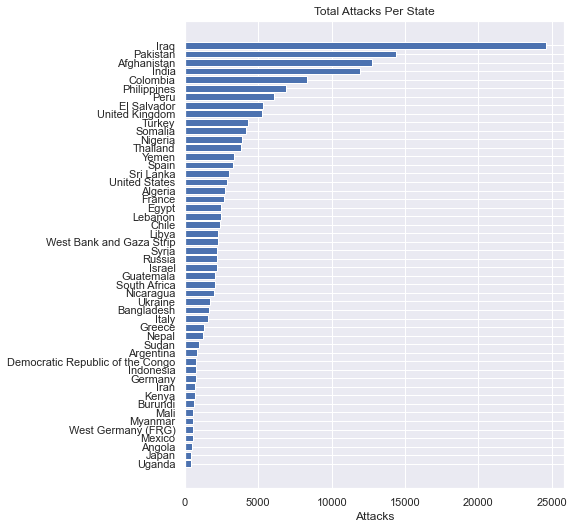

In [28]:
countryGrp = df["country_txt"].value_counts()
#countryGrp
with open("D:\Open Classroom\Data Files\Global Terrorism Database\globalterrorismdb_0718dist.csv") as file:
    reader = csv.DictReader(file)
    fileCounter = Counter()
    
    for line in reader:
        fileCounter.update(line["country_txt"].split(","))

country = []
attacks = []

for i in fileCounter.most_common(50):
    country.append(i[0])
    attacks.append(i[1])

country.reverse()
attacks.reverse()
plt.figure(figsize = [6.8, 8.6])
plt.barh(country, attacks)
plt.title("Total Attacks Per State")
plt.xlabel("Attacks")
plt.show()

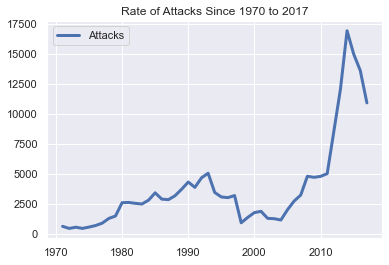

In [29]:
yearGrp = df.groupby("iyear")
year1970 = yearGrp.get_group(1970)
attacks = yearGrp["iyear"].value_counts()
year = 1970
targetYear = 2017
dbYears = []
while year < targetYear:
    year += 1
    dbYears.append(year)
plt.plot(dbYears, attacks, linewidth = 3, label = "Attacks")
plt.title("Rate of Attacks Since 1970 to 2017")
plt.legend(loc = "best")

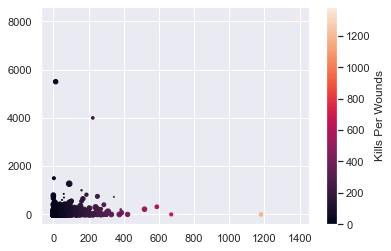

In [30]:
nkill = df["nkill"]
nwound = df["nwound"]
day = df["iday"]

plt.scatter(nkill, nwound, s = day, c = nkill)
cbar = plt.colorbar()
cbar.set_label("Kills Per Wounds")

In [36]:
regionGrp = df.groupby("region_txt")
regionGrp["country_txt"].value_counts()
#regionGrp["region_txt"].value_counts()

region_txt                   country_txt                     
Australasia & Oceania        Australia                             111
                             Papua New Guinea                       89
                             New Caledonia                          31
                             New Zealand                            19
                             Fiji                                   16
                             Solomon Islands                         4
                             French Polynesia                        3
                             Vanuatu                                 2
                             New Hebrides                            1
                             Wallis and Futuna                       1
Central America & Caribbean  El Salvador                          5277
                             Guatemala                            2023
                             Nicaragua                            1958
               

In [56]:
year = (df["iyear"] >= 1970) & (df["iyear"] <= 1980)
df.loc[year, "country_txt"].value_counts().head(10)

United Kingdom    1764
United States     1529
El Salvador       1124
Italy             1113
Spain             1058
Turkey             569
France             559
Colombia           545
Guatemala          395
Argentina          330
Name: country_txt, dtype: int64

In [60]:
df["country_txt"].value_counts().head()

Iraq           24616
Pakistan       14331
Afghanistan    12718
India          11931
Colombia        8232
Name: country_txt, dtype: int64